In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [10]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set

df = pd.DataFrame(np.array(calc_temps('2015-01-2016', '2016-01-2017')),
                  columns=['TMIN','TAVG', 'TMAX'])
print(df)

TMIN = df.iloc[0,0]
TAVG = df.iloc[0,1]
TMAX = df.iloc[0,2]
y_err = TMAX-TMIN

print(TMIN)
print(round(TAVG))
print(TMAX)
print(y_err)

   TMIN       TAVG  TMAX
0  56.0  74.070741  86.0
56.0
74.0
86.0
30.0


<ErrorbarContainer object of 3 artists>

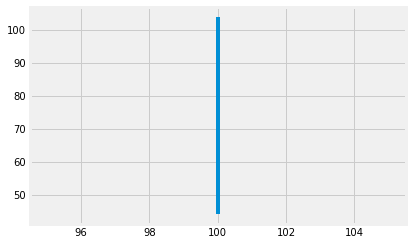

In [11]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

x = 100
ptp = y_err
y = TAVG

plt.errorbar(x, y, yerr=ptp)


### Daily Rainfall Average

In [12]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
df = pd.DataFrame(engine.execute('SELECT * FROM Measurement').fetchall())
df = df.rename(columns={0:"id", 1:"station", 2:"date", 3: "prcp", 4:"tobs"}).set_index('id').sort_values('date')
df2 = pd.DataFrame(engine.execute('SELECT * FROM Station').fetchall())
df2 = df2.rename(columns={0:"index", 1:"station", 2:"name", 3: "latitude", 4:"longitude", 5:"elevation"}).set_index('index')
df3 = df.merge(df2, how="left", on="station").sort_values('prcp',ascending=False)
df3 = df3[(df3['date'] >= '2016-08-01') & (df3['date'] <= '2017-08-01')]
df3

,station,date,prcp,tobs,name,latitude,longitude,elevation
17463,USC00516128,2016-09-14,6.70,73.0,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
18890,USC00519523,2017-04-29,6.25,70.0,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
18410,USC00519523,2017-02-11,5.04,70.0,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
19397,USC00516128,2017-07-22,4.00,72.0,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
17179,USC00519281,2016-08-01,3.53,76.0,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
...,...,...,...,...,...,...,...,...
19422,USC00517948,2017-07-26,NaN,78.0,"PEARL CITY, HI US",21.39340,-157.97510,11.9
19430,USC00517948,2017-07-27,NaN,79.0,"PEARL CITY, HI US",21.39340,-157.97510,11.9
19454,USC00517948,2017-07-31,NaN,81.0,"PEARL CITY, HI US",21.39340,-157.97510,11.9
19456,USC00514830,2017-07-31,NaN,81.0,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0


In [18]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [81]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'
date_range = []
# Use the start and end date to create a range of dates
start = dt.datetime.strptime(start_date, "%Y-%m-%d")
end = dt.datetime.strptime(end_date, "%Y-%m-%d")
date_generated = [start + dt.timedelta(days=x) for x in range(0, (end-start).days)]

# Strip off the year and save a list of strings in the format %m-%d
for date in date_generated:
    date_range.append(date.strftime("%m-%d"))

# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.

normals = []
for date in date_range:
    normals.append(str(daily_normals(date)))
print(normals)
print('----------')

df2 = pd.DataFrame(normals)
df2 = df2.rename(columns={0:"normals"})
df2[['tmin','tavg','tmax']] = pd.DataFrame(df2["normals"].str.strip("[()]").str.split(', ', expand=True))
df2 = df2.drop(["normals"], axis=1)
df2['tmin'] = pd.to_numeric(df2['tmin'], downcast="float")
df2['tmax'] = pd.to_numeric(df2['tmax'], downcast="float")
df2['tavg'] = pd.to_numeric(df2['tavg'], downcast="float")
df2

['[(67.0, 75.54, 83.0)]', '[(68.0, 75.60377358490567, 84.0)]', '[(70.0, 76.61111111111111, 85.0)]', '[(69.0, 76.71153846153847, 84.0)]', '[(69.0, 76.14814814814815, 82.0)]', '[(67.0, 76.25, 83.0)]']
----------


,tmin,tavg,tmax
0,67.0,75.540001,83.0
1,68.0,75.603775,84.0
2,70.0,76.611115,85.0
3,69.0,76.711540,84.0
4,69.0,76.148148,82.0
5,67.0,76.250000,83.0


In [82]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
result = pd.DataFrame(date_range)
plot_df = result.join(df2, how="left")
plot_df = plot_df.rename(columns={0:"date"})
plot_df

,date,tmin,tavg,tmax
0,08-01,67.0,75.540001,83.0
1,08-02,68.0,75.603775,84.0
2,08-03,70.0,76.611115,85.0
3,08-04,69.0,76.711540,84.0
4,08-05,69.0,76.148148,82.0
5,08-06,67.0,76.250000,83.0


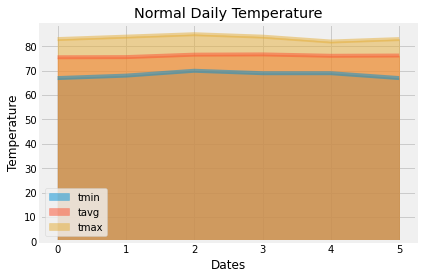

In [102]:
# Plot the daily normals as an area plot with `stacked=False`

final_plot = plot_df.plot(kind='area', stacked=False)
plt.title('Normal Daily Temperature')
plt.xlabel('Dates')
plt.ylabel('Temperature')

final_plot

## Close Session